<a href="https://colab.research.google.com/github/yeseul515/sessac_test2/blob/self-study/231127_CNN(LeNet5_Modeling%26Training).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Networks

## Training LeNet

In [12]:
import torch
import torch.nn as nn
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
from torch.optim import SGD
from tqdm import tqdm

# H, W = 28, 28
# image = torch.randn(size=(8, 1, H, W)) #input size = (8, 1, 28, 28)  #B, C, H, W

BATCH_SIZE = 32
LR = 0.003
EPOCHS = 10

dataset = MNIST(root='data', train=True, download=True, transform=ToTensor())
dataloader = DataLoader(dataset=dataset, batch_size=BATCH_SIZE)
n_sample = len(dataset)

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, padding=2, stride=1),
            nn.Tanh(),

            nn.AvgPool2d(kernel_size=2, stride=2),

            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, padding=0, stride=1),
            nn.Tanh(),

            nn.AvgPool2d(kernel_size=2, stride=2),

            nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5, padding=0, stride=1),
            nn.Tanh())

        self.fc = nn.Sequential(
            nn.Linear(in_features=120, out_features=84),
            nn.Tanh(),

            nn.Linear(in_features=84, out_features=10))

    def forward(self, image):
        x = self.model(image)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

if torch.cuda.is_available(): DEVICE = 'cuda'
elif torch.backends.mps.is_available(): DEVICE = 'mps'
else: DEVICE = 'cpu'

model = CNN().to(DEVICE)
loss_function = nn.CrossEntropyLoss()
optimizer = SGD(model.parameters(), lr=LR)

#Training
losses, accs = [], []
for epoch in range(EPOCHS):
    epoch_loss, n_corrects = 0., 0
    for X, y in tqdm(dataloader):
        X, y = X.to(DEVICE), y.to(DEVICE)

        pred = model(X)
        loss = loss_function(pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item() * len(X)
        n_corrects += (torch.max(pred, axis=1)[1] == y).sum().item()

    epoch_loss /= n_sample
    losses.append(epoch_loss)

    epoch_acc = n_corrects / n_sample
    accs.append(epoch_acc)

    print(f"Epoch: {epoch+1}")
    print(f"Loss: {epoch_loss: .4f}, Acc: {epoch_acc: .4f}")

100%|██████████| 1875/1875 [00:11<00:00, 169.54it/s]


Epoch: 1
Loss:  2.2024, Acc:  0.3583


100%|██████████| 1875/1875 [00:10<00:00, 174.90it/s]


Epoch: 2
Loss:  1.1583, Acc:  0.7117


100%|██████████| 1875/1875 [00:10<00:00, 175.19it/s]


Epoch: 3
Loss:  0.5750, Acc:  0.8512


100%|██████████| 1875/1875 [00:12<00:00, 155.40it/s]


Epoch: 4
Loss:  0.4306, Acc:  0.8819


100%|██████████| 1875/1875 [00:11<00:00, 161.20it/s]


Epoch: 5
Loss:  0.3638, Acc:  0.8962


100%|██████████| 1875/1875 [00:11<00:00, 167.08it/s]


Epoch: 6
Loss:  0.3218, Acc:  0.9063


100%|██████████| 1875/1875 [00:10<00:00, 171.18it/s]


Epoch: 7
Loss:  0.2902, Acc:  0.9152


100%|██████████| 1875/1875 [00:10<00:00, 177.46it/s]


Epoch: 8
Loss:  0.2643, Acc:  0.9220


100%|██████████| 1875/1875 [00:10<00:00, 176.97it/s]


Epoch: 9
Loss:  0.2421, Acc:  0.9284


100%|██████████| 1875/1875 [00:11<00:00, 169.31it/s]

Epoch: 10
Loss:  0.2227, Acc:  0.9339


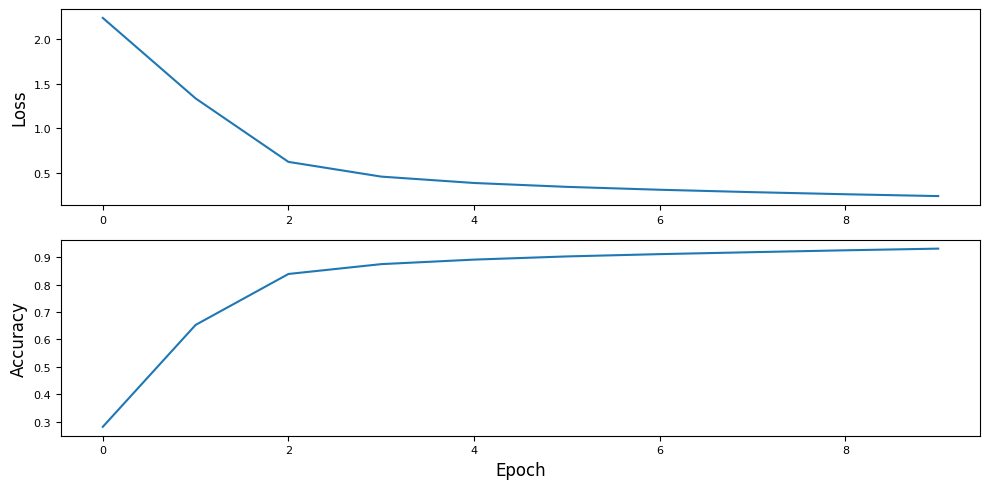

In [11]:
fig, axes = plt.subplots(2, 1, figsize=(10, 5))

axes[0].plot(losses)
axes[1].plot(accs)

axes[0].set_ylabel('Loss', fontsize=12)
axes[1].set_ylabel('Accuracy', fontsize=12)
axes[1].set_xlabel('Epoch', fontsize=12)

axes[0].tick_params(labelsize=8)
axes[1].tick_params(labelsize=8)

fig.tight_layout()